In [1]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

In [4]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional , GRU , RepeatVector
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import pandas
from keras.models import load_model
from os.path import isfile
import os
from keras.optimizers import Adam
import pickle

In [5]:
n_epoch= 100

# DL for Engineered Features - Scaled

In [6]:
def getFeaturesAndTargetRemoveDate(_df):
    train_y = _df['Target']
    train = _df.drop(['date','Target'],axis =1)
    return train, train_y

In [7]:
trainingData = pd.read_csv('train_tw_nw_fi.csv')
testingData =  pd.read_csv('test_tw_nw_fi.csv')

In [8]:
train, train_y = getFeaturesAndTargetRemoveDate(trainingData)
test, test_y = getFeaturesAndTargetRemoveDate(testingData)

In [9]:
train.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'sma2', 'sma2_1',
       'sma2_increment', 'sma2_1_increment', 'vol_increment',
       'vol_rel_increment', 'open_1', 'open_incr', 'open', 'ma7', 'ma21',
       '26ema', '12ema', 'MACD', '30 Day MA', '30 Day STD', 'upper_band',
       'lower_band', 'ema', 'momentum', 'log_momentum', 'fft', 'absolute',
       'angle', 'news_len', 'lm_positive_x', 'lm_negative_x', 'lm_polarity_x',
       'lm_subjectivity_x', 'actvie_x', 'passive_x', 'weak_x', 'strong_x',
       'anger_x', 'joy_x', 'suprise_x', 'sadness_x', 'disgust_x',
       'anticipation_x', 'fear_x', 'trust_x', 'tb_polarity_x',
       'tb_subjectivity_x', 'hiv4_positive_x', 'hiv4_negative_x',
       'hiv4_polarity_x', 'hiv4_subjectivity_x', 'lm_positive_y',
       'retweet_count', 'tweet_len', 'lm_negative_y', 'lm_polarity_y',
       'lm_subjectivity_y', 'actvie_y', 'passive_y', 'weak_y', 'strong_y',
       'anger_y', 'joy_y', 'suprise_y', 'sadness_y', 'disgust_y',
       '

In [10]:
print('train',train.shape,'test',test.shape,'len(train_y)',len(train_y),'len(test_y)',len(test_y))

train (4696, 77) test (308, 77) len(train_y) 4696 len(test_y) 308


In [11]:
def DenseNetwork():
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Dense(100,activation='relu',input_dim=77,kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3, noise_shape=None, seed=None))

    #Hidden Layer-2
    model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3, noise_shape=None, seed=None))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [12]:
def CNN_LSTMNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(LSTM(100))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [13]:
def RNNNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(keras.layers.SimpleRNN(100, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))
    
    #Hidden Layer-2
    model.add(RepeatVector(1))
    
    #Hidden Layer-3
    model.add(keras.layers.SimpleRNN(100, return_sequences=True))

    #Output layer
    model.add(keras.layers.TimeDistributed(Dense(1,activation='sigmoid')))
#     model.summary()
    return model

In [14]:
def CNN_RNNNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(keras.layers.SimpleRNN(100, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [15]:
def CNN_GRUNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(GRU(100))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [16]:
def CNN_BideirectionalLSTMNetwork(inpuFeatures):
    #defifne a sequentail Model
    model = Sequential()

    #Hidden Layer-1
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(inpuFeatures, 1)))
    #Hidden Layer-2
    model.add(MaxPooling1D(pool_size=2))
    #Hidden Layer-3
    model.add(Bidirectional(LSTM(100)))

    #Output layer
    model.add(Dense(1,activation='sigmoid'))
    model.summary()
    return model

In [17]:
def evaluateModelAndTestAccuracy(model,trainX, trainY, testX, testY,n_epoch):
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(trainX, trainY, epochs=n_epoch, validation_split=0.1,batch_size=256, verbose=1,)
    
    results = model.evaluate(testX, testY)
    
    y_pred = model.predict_classes(testX)
    print("Evaluation on test data: Loss - {0},  Acurracy - {1}".format(results[0],str(results[1]*100)))
    print('classification_score\n',classification_report(y_pred, testY))
    
    return history

In [18]:
def vizModelMetric(history,n_epoch):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, n_epoch), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, n_epoch), history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, n_epoch), history.history["acc"], label="train_acc")
    plt.plot(np.arange(0, n_epoch), history.history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()

In [19]:
def NaivePredition(y_test):
    
    y_testCheck = y_test.copy()
    y_pred = list()
    
    for counter in range(len(y_testCheck)-1):
        y_pred.append(y_testCheck[counter])
    
    y_testCheck = y_testCheck[1:]
    print ('Model accuracy = %.3f' % accuracy_score(y_pred,y_testCheck))

    print('classification_score\n',classification_report(y_pred, y_testCheck))

In [20]:
NaivePredition(list(test_y))

Model accuracy = 0.811
classification_score
               precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       139
         1.0       0.83      0.83      0.83       168

   micro avg       0.81      0.81      0.81       307
   macro avg       0.81      0.81      0.81       307
weighted avg       0.81      0.81      0.81       307



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               7800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 18,001
Trainable params: 18,001
Non-trainable params: 0
_________________

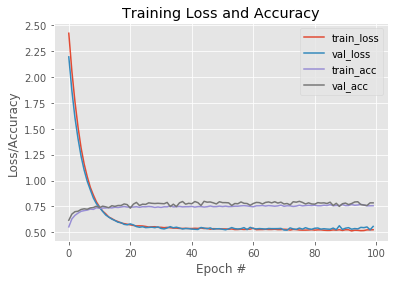

In [21]:
vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(),train, train_y, test, test_y ,n_epoch),n_epoch)

In [22]:
# Research paper and models -> https://github.com/EmielStoelinga/CCMLWI

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/100
4226/4226 [==============================] - 4s 855us/step - loss: 0.6935 - acc: 0.5028 - val_loss: 0.6846 - val_acc: 0.5787
Epoch 2/100
4226/4226 [==============================] - 1s 286us/step - loss: 0.6923 

Epoch 54/100
4226/4226 [==============================] - 1s 277us/step - loss: 0.5563 - acc: 0.7139 - val_loss: 0.6880 - val_acc: 0.5787
Epoch 55/100
4226/4226 [==============================] - 1s 274us/step - loss: 0.5501 - acc: 0.7125 - val_loss: 0.6618 - val_acc: 0.5894
Epoch 56/100
4226/4226 [==============================] - 1s 264us/step - loss: 0.5340 - acc: 0.7234 - val_loss: 0.7017 - val_acc: 0.6000
Epoch 57/100
4226/4226 [==============================] - 1s 276us/step - loss: 0.5350 - acc: 0.7288 - val_loss: 0.6792 - val_acc: 0.5489
Epoch 58/100
4226/4226 [==============================] - 1s 284us/step - loss: 0.5339 - acc: 0.7241 - val_loss: 0.7441 - val_acc: 0.5872
Epoch 59/100
4226/4226 [==============================] - 1s 300us/step - loss: 0.5406 - acc: 0.7220 - val_loss: 0.6865 - val_acc: 0.5915
Epoch 60/100
4226/4226 [==============================] - 1s 275us/step - loss: 0.5327 - acc: 0.7227 - val_loss: 0.7861 - val_acc: 0.5872
Epoch 61/100
4226/4226 [==========

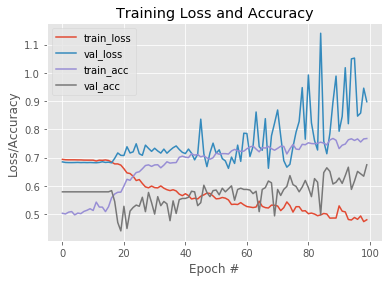

In [23]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_LSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 38, 32)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 201       
Total params: 106,729
Trainable params: 106,729
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/100
4226/4226 [==============================] - 4s 1ms/step - loss: 0.6978 - acc: 0.5057 - val_loss: 0.6955 - val_acc: 0.5787
Epoch 2/100
4226/4226 [==============================] - 2s 428us/step - loss: 0.6931 

Epoch 54/100
4226/4226 [==============================] - 2s 431us/step - loss: 0.5423 - acc: 0.7222 - val_loss: 0.5956 - val_acc: 0.6851
Epoch 55/100
4226/4226 [==============================] - 2s 424us/step - loss: 0.5426 - acc: 0.7120 - val_loss: 0.6185 - val_acc: 0.6723
Epoch 56/100
4226/4226 [==============================] - 2s 439us/step - loss: 0.5247 - acc: 0.7333 - val_loss: 0.5971 - val_acc: 0.6787
Epoch 57/100
4226/4226 [==============================] - 2s 425us/step - loss: 0.5109 - acc: 0.7501 - val_loss: 0.5936 - val_acc: 0.7021
Epoch 58/100
4226/4226 [==============================] - 2s 434us/step - loss: 0.5025 - acc: 0.7629 - val_loss: 0.5655 - val_acc: 0.7149
Epoch 59/100
4226/4226 [==============================] - 2s 427us/step - loss: 0.4846 - acc: 0.7601 - val_loss: 0.5631 - val_acc: 0.7340
Epoch 60/100
4226/4226 [==============================] - 2s 425us/step - loss: 0.4773 - acc: 0.7676 - val_loss: 0.6614 - val_acc: 0.6319
Epoch 61/100
4226/4226 [==========

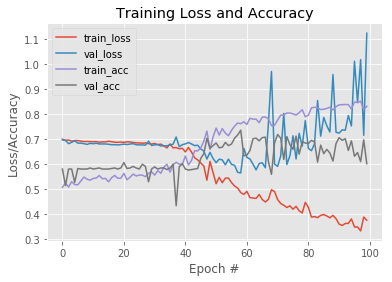

In [35]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 38, 32)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 40,129
Trainable params: 40,129
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/100
4226/4226 [==============================] - 3s 755us/step - loss: 0.6967 - acc: 0.4991 - val_loss: 0.7082 - val_acc: 0.4447
Epoch 2/100
4226/4226 [==============================] - 1s 242us/step - loss: 0.6935 

Epoch 54/100
4226/4226 [==============================] - 1s 236us/step - loss: 0.6844 - acc: 0.5677 - val_loss: 0.6848 - val_acc: 0.5617
Epoch 55/100
4226/4226 [==============================] - 1s 236us/step - loss: 0.6867 - acc: 0.5085 - val_loss: 0.6864 - val_acc: 0.5553
Epoch 56/100
4226/4226 [==============================] - 1s 247us/step - loss: 0.6807 - acc: 0.5502 - val_loss: 0.6861 - val_acc: 0.5766
Epoch 57/100
4226/4226 [==============================] - 1s 230us/step - loss: 0.6604 - acc: 0.6162 - val_loss: 0.6908 - val_acc: 0.5064
Epoch 58/100
4226/4226 [==============================] - 1s 228us/step - loss: 0.7026 - acc: 0.5473 - val_loss: 0.6877 - val_acc: 0.5766
Epoch 59/100
4226/4226 [==============================] - 1s 250us/step - loss: 0.6912 - acc: 0.5073 - val_loss: 0.6912 - val_acc: 0.5362
Epoch 60/100
4226/4226 [==============================] - 1s 230us/step - loss: 0.6895 - acc: 0.5059 - val_loss: 0.6894 - val_acc: 0.5787
Epoch 61/100
4226/4226 [==========

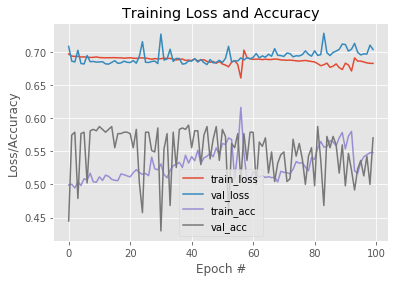

In [36]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 38, 32)            0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 13,529
Trainable params: 13,529
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/100
4226/4226 [==============================] - 3s 610us/step - loss: 0.7090 - acc: 0.5024 - val_loss: 0.6850 - val_acc: 0.5745
Epoch 2/100
4226/4226 [==============================] - 1s 132us/step - loss: 0.6940 

Epoch 54/100
4226/4226 [==============================] - 0s 113us/step - loss: 0.6799 - acc: 0.5530 - val_loss: 0.6817 - val_acc: 0.5872
Epoch 55/100
4226/4226 [==============================] - 0s 110us/step - loss: 0.6821 - acc: 0.5542 - val_loss: 0.6812 - val_acc: 0.5851
Epoch 56/100
4226/4226 [==============================] - 0s 111us/step - loss: 0.6821 - acc: 0.5558 - val_loss: 0.6812 - val_acc: 0.5872
Epoch 57/100
4226/4226 [==============================] - 0s 110us/step - loss: 0.6779 - acc: 0.5684 - val_loss: 0.6834 - val_acc: 0.5830
Epoch 58/100
4226/4226 [==============================] - 0s 112us/step - loss: 0.6786 - acc: 0.5719 - val_loss: 0.6819 - val_acc: 0.5872
Epoch 59/100
4226/4226 [==============================] - 0s 111us/step - loss: 0.6804 - acc: 0.5632 - val_loss: 0.6810 - val_acc: 0.5851
Epoch 60/100
4226/4226 [==============================] - 0s 117us/step - loss: 0.6882 - acc: 0.5452 - val_loss: 0.6816 - val_acc: 0.5766
Epoch 61/100
4226/4226 [==========

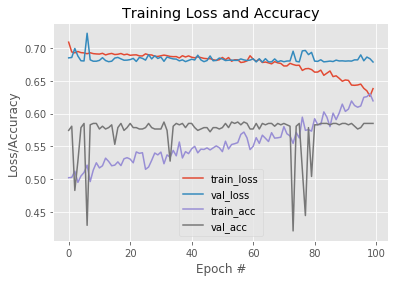

In [38]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

# DL for Engineered Features - Unscaled

In [39]:
trainingData = pd.read_csv('train_ns_tw_nw_fi.csv')
testingData =  pd.read_csv('test_ns_tw_nw_fi.csv')

train, train_y = getFeaturesAndTargetRemoveDate(trainingData)
test, test_y = getFeaturesAndTargetRemoveDate(testingData)

print('train',train.shape,'test',test.shape,'len(train_y)',len(train_y),'len(test_y)',len(test_y))

train (4696, 77) test (308, 77) len(train_y) 4696 len(test_y) 308


In [40]:
NaivePredition(list(test_y))

Model accuracy = 0.811
classification_score
               precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       139
         1.0       0.83      0.83      0.83       168

   micro avg       0.81      0.81      0.81       307
   macro avg       0.81      0.81      0.81       307
weighted avg       0.81      0.81      0.81       307



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 100)               7800      
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 101       
Total params: 18,001
Trainable params: 18,001
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/100
4226/4226 [==============================] - 2s 492us/step - loss: 9.7023 - acc

C:\Users\praveen ji\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


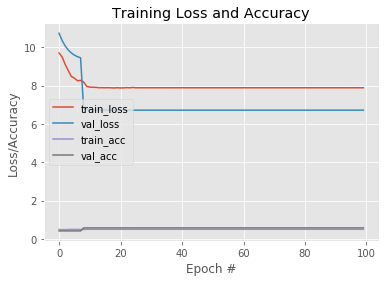

In [41]:
vizModelMetric(evaluateModelAndTestAccuracy(DenseNetwork(),train, train_y, test, test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 38, 32)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 53,429
Trainable params: 53,429
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/100
4226/4226 [==============================] - 4s 861us/step - loss: 0.6940 - acc: 0.5002 - val_loss: 0.6822 - val_acc: 0.5830
Epoch 2/100
4226/4226 [==============================] - 1s 281us/step - loss: 0.6929 

Epoch 54/100
4226/4226 [==============================] - 1s 285us/step - loss: 0.6904 - acc: 0.5215 - val_loss: 0.6804 - val_acc: 0.5830
Epoch 55/100
4226/4226 [==============================] - 1s 277us/step - loss: 0.6900 - acc: 0.5244 - val_loss: 0.6829 - val_acc: 0.5787
Epoch 56/100
4226/4226 [==============================] - 1s 280us/step - loss: 0.6899 - acc: 0.5222 - val_loss: 0.6802 - val_acc: 0.5766
Epoch 57/100
4226/4226 [==============================] - 1s 284us/step - loss: 0.6900 - acc: 0.5239 - val_loss: 0.6818 - val_acc: 0.5787
Epoch 58/100
4226/4226 [==============================] - 1s 285us/step - loss: 0.6899 - acc: 0.5163 - val_loss: 0.6806 - val_acc: 0.5830
Epoch 59/100
4226/4226 [==============================] - 1s 276us/step - loss: 0.6896 - acc: 0.5239 - val_loss: 0.6804 - val_acc: 0.5830
Epoch 60/100
4226/4226 [==============================] - 1s 278us/step - loss: 0.6897 - acc: 0.5144 - val_loss: 0.6796 - val_acc: 0.5830
Epoch 61/100
4226/4226 [==========

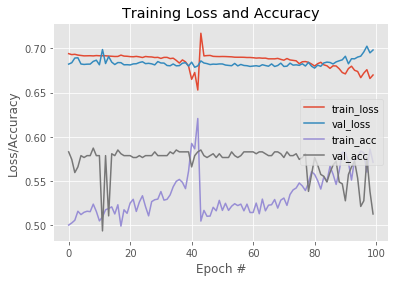

In [42]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_LSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 38, 32)            0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200)               106400    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 201       
Total params: 106,729
Trainable params: 106,729
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/100
4226/4226 [==============================] - 5s 1ms/step - loss: 0.7144 - acc: 0.5099 - val_loss: 0.6831 - val_acc: 0.5809
Epoch 2/100
4226/4226 [==============================] - 2s 428us/step - loss: 0.6960 

Epoch 54/100
4226/4226 [==============================] - 2s 437us/step - loss: 0.6776 - acc: 0.5717 - val_loss: 0.6748 - val_acc: 0.5787
Epoch 55/100
4226/4226 [==============================] - 2s 438us/step - loss: 0.6739 - acc: 0.5762 - val_loss: 0.6702 - val_acc: 0.5894
Epoch 56/100
4226/4226 [==============================] - 2s 457us/step - loss: 0.6711 - acc: 0.5861 - val_loss: 0.6794 - val_acc: 0.5702
Epoch 57/100
4226/4226 [==============================] - 2s 421us/step - loss: 0.6765 - acc: 0.5632 - val_loss: 0.6913 - val_acc: 0.5511
Epoch 58/100
4226/4226 [==============================] - 2s 421us/step - loss: 0.6700 - acc: 0.5906 - val_loss: 0.6706 - val_acc: 0.5702
Epoch 59/100
4226/4226 [==============================] - 2s 414us/step - loss: 0.6597 - acc: 0.6254 - val_loss: 0.6738 - val_acc: 0.5915
Epoch 60/100
4226/4226 [==============================] - 2s 438us/step - loss: 0.6642 - acc: 0.5999 - val_loss: 0.7153 - val_acc: 0.5787
Epoch 61/100
4226/4226 [==========

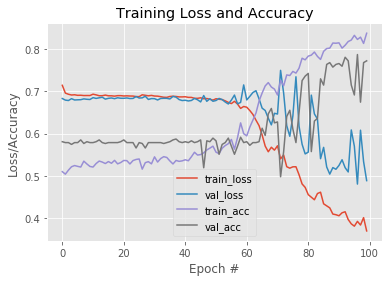

In [43]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_BideirectionalLSTMNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 38, 32)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 101       
Total params: 40,129
Trainable params: 40,129
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/100
4226/4226 [==============================] - 4s 914us/step - loss: 0.6959 - acc: 0.4946 - val_loss: 0.7016 - val_acc: 0.5128
Epoch 2/100
4226/4226 [==============================] - 1s 244us/step - loss: 0.6930 

Epoch 54/100
4226/4226 [==============================] - 1s 234us/step - loss: 0.6824 - acc: 0.5495 - val_loss: 0.6968 - val_acc: 0.5553
Epoch 55/100
4226/4226 [==============================] - 1s 233us/step - loss: 0.6817 - acc: 0.5530 - val_loss: 0.7001 - val_acc: 0.5468
Epoch 56/100
4226/4226 [==============================] - 1s 238us/step - loss: 0.6805 - acc: 0.5523 - val_loss: 0.6857 - val_acc: 0.5681
Epoch 57/100
4226/4226 [==============================] - 1s 227us/step - loss: 0.6805 - acc: 0.5537 - val_loss: 0.7038 - val_acc: 0.5404
Epoch 58/100
4226/4226 [==============================] - 1s 240us/step - loss: 0.6799 - acc: 0.5592 - val_loss: 0.7044 - val_acc: 0.5468
Epoch 59/100
4226/4226 [==============================] - 1s 227us/step - loss: 0.6808 - acc: 0.5450 - val_loss: 0.7296 - val_acc: 0.5234
Epoch 60/100
4226/4226 [==============================] - 1s 229us/step - loss: 0.6786 - acc: 0.5521 - val_loss: 0.6996 - val_acc: 0.5383
Epoch 61/100
4226/4226 [==========

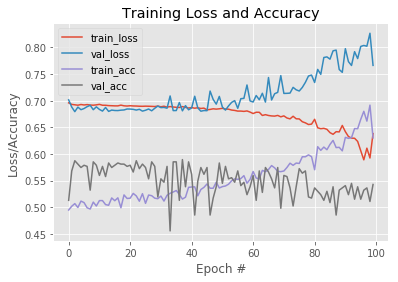

In [44]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_GRUNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 77, 32)            128       
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 38, 32)            0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 101       
Total params: 13,529
Trainable params: 13,529
Non-trainable params: 0
_________________________________________________________________
Train on 4226 samples, validate on 470 samples
Epoch 1/100
4226/4226 [==============================] - 3s 733us/step - loss: 0.6978 - acc: 0.5052 - val_loss: 0.6852 - val_acc: 0.5787
Epoch 2/100
4226/4226 [==============================] - 1s 136us/step - loss: 0.6934 

Epoch 54/100
4226/4226 [==============================] - 1s 126us/step - loss: 0.6774 - acc: 0.5703 - val_loss: 0.6821 - val_acc: 0.5787
Epoch 55/100
4226/4226 [==============================] - 1s 128us/step - loss: 0.6767 - acc: 0.5712 - val_loss: 0.6825 - val_acc: 0.5787
Epoch 56/100
4226/4226 [==============================] - 1s 127us/step - loss: 0.6787 - acc: 0.5681 - val_loss: 0.6806 - val_acc: 0.5766
Epoch 57/100
4226/4226 [==============================] - 1s 126us/step - loss: 0.6769 - acc: 0.5667 - val_loss: 0.6842 - val_acc: 0.5787
Epoch 58/100
4226/4226 [==============================] - 1s 124us/step - loss: 0.6760 - acc: 0.5715 - val_loss: 0.6954 - val_acc: 0.4213
Epoch 59/100
4226/4226 [==============================] - 1s 126us/step - loss: 0.6786 - acc: 0.5563 - val_loss: 0.6802 - val_acc: 0.5787
Epoch 60/100
4226/4226 [==============================] - 1s 127us/step - loss: 0.6731 - acc: 0.5771 - val_loss: 0.6810 - val_acc: 0.5787
Epoch 61/100
4226/4226 [==========

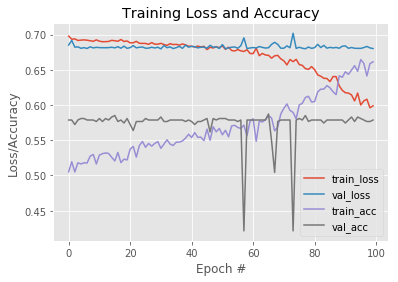

In [45]:
inputFeatures = train.shape[1]
vizModelMetric(evaluateModelAndTestAccuracy(CNN_RNNNetwork(inputFeatures),np.expand_dims(train, axis=2), train_y, np.expand_dims(test, axis=2) , test_y ,n_epoch),n_epoch)